# Agregacion de datos por categorias

In [21]:
import numpy as np
import pandas as pd 

In [22]:
gender = [ "Male", "Female"]
income = ["Poor","Middle Class", "Rich"]

In [23]:
n = 500
gender_data=[]
income_data=[]
for i in range (0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [24]:
income_data[0:10]

['Rich',
 'Rich',
 'Rich',
 'Rich',
 'Rich',
 'Rich',
 'Poor',
 'Rich',
 'Poor',
 'Middle Class']

In [25]:
#m + s * z
height = 160 + 30 * np.random.randn(n)
weight= 65 +30 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income= 18000 + 3500 * np.random.randn(n)

In [26]:
data = pd.DataFrame(
    {
        "Genero": gender_data,
        "Situacion Economica": income_data,
        "Height" : height,
        "Peso": weight,
        "Edad": age,
        "Income": income
    }




)

In [27]:
data

,Genero,Situacion Economica,Height,Peso,Edad,Income
0,Male,Rich,151.042558,83.111889,29.523529,22356.150950
1,Female,Rich,155.792569,100.299180,46.201637,18611.641848
2,Male,Rich,147.853735,-23.486364,21.949782,17657.493417
3,Female,Rich,121.147744,81.485192,15.253052,17913.897936
4,Female,Rich,139.442905,94.689391,30.288096,19424.964687
...,...,...,...,...,...,...
495,Female,Rich,108.776097,66.419776,34.778671,14679.526106
496,Female,Middle Class,201.499622,47.618843,52.665379,16833.196667
497,Female,Rich,163.505233,66.224703,26.863944,17841.795286
498,Male,Poor,184.658839,67.819480,33.207831,21507.376016


# agrupacion

In [143]:
grouped_gender = data.groupby("Genero")

KeyError: 'Genero'

In [ ]:
grouped_gender.groups

In [140]:
for names , groups in grouped_gender:
    print(names)
    print(groups)

Female
     Genero Situacion Economica      Height        Peso       Edad  \
1    Female                Rich  155.792569  100.299180  46.201637   
3    Female                Rich  121.147744   81.485192  15.253052   
4    Female                Rich  139.442905   94.689391  30.288096   
5    Female                Rich  171.503773   82.778540  24.359192   
6    Female                Poor  162.461660   46.176473  29.265352   
..      ...                 ...         ...         ...        ...   
490  Female        Middle Class  192.424754   51.147085  32.953448   
491  Female                Poor  177.877349  118.726951  40.623161   
495  Female                Rich  108.776097   66.419776  34.778671   
496  Female        Middle Class  201.499622   47.618843  52.665379   
497  Female                Rich  163.505233   66.224703  26.863944   

           Income  
1    18611.641848  
3    17913.897936  
4    19424.964687  
5    16471.686162  
6    16373.434307  
..            ...  
490  10503.5

In [144]:
grouped_gender.get_group("Female")

,Genero,Situacion Economica,Height,Peso,Edad,Income
1,Female,Rich,155.792569,100.299180,46.201637,18611.641848
3,Female,Rich,121.147744,81.485192,15.253052,17913.897936
4,Female,Rich,139.442905,94.689391,30.288096,19424.964687
5,Female,Rich,171.503773,82.778540,24.359192,16471.686162
6,Female,Poor,162.461660,46.176473,29.265352,16373.434307
...,...,...,...,...,...,...
490,Female,Middle Class,192.424754,51.147085,32.953448,10503.598382
491,Female,Poor,177.877349,118.726951,40.623161,21026.212006
495,Female,Rich,108.776097,66.419776,34.778671,14679.526106
496,Female,Middle Class,201.499622,47.618843,52.665379,16833.196667


In [ ]:
pd.concat([grouped_gender.get_group(name) for name in groups])


In [37]:
double_group = data.groupby(["Genero", "Situacion Economica"])

In [39]:
len(double_group)

6

In [40]:
for names , groups in double_group :
    print(names)
    print(groups)

('Female', 'Middle Class')
     Genero Situacion Economica      Height       Peso       Edad  \
9    Female        Middle Class  148.109186  77.986260  31.138355   
10   Female        Middle Class  213.951374  69.309734  33.835194   
12   Female        Middle Class  182.687032  64.144581  25.162230   
16   Female        Middle Class  201.413229   0.667643  38.223342   
19   Female        Middle Class  159.298862  38.835340  44.868130   
..      ...                 ...         ...        ...        ...   
484  Female        Middle Class  147.118673  75.882972  25.919139   
485  Female        Middle Class  191.629579  64.220753  35.904850   
486  Female        Middle Class  165.489172  54.650921  44.446384   
490  Female        Middle Class  192.424754  51.147085  32.953448   
496  Female        Middle Class  201.499622  47.618843  52.665379   

           Income  
9    21260.551098  
10   14784.263173  
12    8518.582511  
16   15276.530018  
19   21930.737090  
..            ...  
484 

# Operaciones sobre daros agrupads

In [41]:
double_group.sum()

Height         Peso         Edad  \
Genero Situacion Economica                                           
Female Middle Class         14413.871820  5556.652314  2893.416183   
       Poor                 14278.633348  6018.946708  2811.451141   
       Rich                 12617.937833  5594.617882  2263.965216   
Male   Middle Class         11347.994406  4186.091468  2030.544808   
       Poor                 12337.800813  4566.941324  2493.428683   
       Rich                 14651.087637  6019.952641  2775.207425   

                                  Income  
Genero Situacion Economica                
Female Middle Class         1.621754e+06  
       Poor                 1.550388e+06  
       Rich                 1.425805e+06  
Male   Middle Class         1.300513e+06  
       Poor                 1.373349e+06  
       Rich                 1.644841e+06

In [42]:
double_group.mean()

Height       Peso       Edad        Income
Genero Situacion Economica                                                
Female Middle Class         158.394196  61.062113  31.795782  17821.476232
       Poor                 160.434083  67.628615  31.589339  17420.087803
       Rich                 157.724223  69.932724  28.299565  17822.563337
Male   Middle Class         162.114206  59.801307  29.007783  18578.758918
       Poor                 156.174694  57.809384  31.562388  17384.166880
       Rich                 161.000963  66.153326  30.496785  18075.174091

In [43]:
double_group.size()

Genero  Situacion Economica
Female  Middle Class           91
        Poor                   89
        Rich                   80
Male    Middle Class           70
        Poor                   79
        Rich                   91
dtype: int64

In [44]:
double_group.describe()

Height                                     \
                            count        mean        std         min   
Genero Situacion Economica                                             
Female Middle Class          91.0  158.394196  30.379004   96.792340   
       Poor                  89.0  160.434083  28.533965  103.445644   
       Rich                  80.0  157.724223  24.789650  105.521172   
Male   Middle Class          70.0  162.114206  29.058268   75.812312   
       Poor                  79.0  156.174694  31.169911   77.521322   
       Rich                  91.0  161.000963  26.991556   96.326581   

                                                                            \
                                   25%         50%         75%         max   
Genero Situacion Economica                                                   
Female Middle Class         137.685299  155.289748  181.168539  237.563933   
       Poor                 140.509467  162.062789  176.564423  253.918730   
       Rich                 139.307621  157.643608  174.090924  209.896299   
Male   Middle Class         146.181855  161.586798  180.145538  234.668281   
       Poor                 130.490756  154.016896  184.922858  218.013774   
       Rich                 141.703374  157.503714  178.623672  232.226871   

                            Peso             ...       Edad            Income  \
                           count       mean  ...        75%        max  count   
Genero Situacion Economica                   ...                                
Female Middle Class         91.0  61.062113  ...  40.050179  64.556886   91.0   
       Poor                 89.0  67.628615  ...  40.623161  64.938521   89.0   
       Rich                 80.0  69.932724  ...  35.411590  66.346371   80.0   
Male   Middle Class         70.0  59.801307  ...  37.841271  52.802492   70.0   
       Poor                 79.0  57.809384  ...  39.877605  56.598161   79.0   
       Rich                 91.0  66.153326  ...  37.227708  63.870383   91.0   

                                                                     \
                                    mean          std           min   
Genero Situacion Economica                                            
Female Middle Class         17821.476232  3516.173039   8518.582511   
       Poor                 17420.087803  3846.595944   8487.668189   
       Rich                 17822.563337  3212.303233   7787.089016   
Male   Middle Class         18578.758918  3565.544644   9019.277537   
       Poor                 17384.166880  3402.947304   9385.455833   
       Rich                 18075.174091  3179.182410  10408.219129   

                                                                      \
                                     25%           50%           75%   
Genero Situacion Economica                                             
Female Middle Class         15655.640484  17644.787843  20258.208040   
       Poor                 14871.956028  17173.884970  19935.677880   
       Rich                 15663.758611  17877.846611  20148.355399   
Male   Middle Class         16023.279535  18899.053086  21621.998572   
       Poor                 15305.166571  17605.838291  19517.885506   
       Rich                 15854.111707  18260.328378  19855.962841   

                                          
                                     max  
Genero Situacion Economica                
Female Middle Class         25836.499512  
       Poor                 26301.191490  
       Rich                 24797.294971  
Male   Middle Class         25617.599562  
       Poor                 28314.219984  
       Rich                 27684.475495  

[6 rows x 32 columns]

In [48]:
grouped_income= double_group["Income"]


In [67]:
grouped_income.describe()

count          mean          std           min  \
Genero Situacion Economica                                                   
Female Middle Class          91.0  17821.476232  3516.173039   8518.582511   
       Poor                  89.0  17420.087803  3846.595944   8487.668189   
       Rich                  80.0  17822.563337  3212.303233   7787.089016   
Male   Middle Class          70.0  18578.758918  3565.544644   9019.277537   
       Poor                  79.0  17384.166880  3402.947304   9385.455833   
       Rich                  91.0  18075.174091  3179.182410  10408.219129   

                                     25%           50%           75%  \
Genero Situacion Economica                                             
Female Middle Class         15655.640484  17644.787843  20258.208040   
       Poor                 14871.956028  17173.884970  19935.677880   
       Rich                 15663.758611  17877.846611  20148.355399   
Male   Middle Class         16023.279535  18899.053086  21621.998572   
       Poor                 15305.166571  17605.838291  19517.885506   
       Rich                 15854.111707  18260.328378  19855.962841   

                                     max  
Genero Situacion Economica                
Female Middle Class         25836.499512  
       Poor                 26301.191490  
       Rich                 24797.294971  
Male   Middle Class         25617.599562  
       Poor                 28314.219984  
       Rich                 27684.475495

In [50]:
double_group.aggregate(
    {
    "Income" : np.sum, 
    "Edad":  np.mean,
    "Peso": np.std
    }
)

Income       Edad       Peso
Genero Situacion Economica                                    
Female Middle Class         1.621754e+06  31.795782  29.310641
       Poor                 1.550388e+06  31.589339  30.816667
       Rich                 1.425805e+06  28.299565  29.644837
Male   Middle Class         1.300513e+06  29.007783  25.394583
       Poor                 1.373349e+06  31.562388  33.469360
       Rich                 1.644841e+06  30.496785  30.923670

In [60]:
double_group.aggregate(
    {
        "Edad":np.mean,
        "Peso": lambda h:(np.mean(h))/np.std(h)
    }
)

Edad      Peso
Genero Situacion Economica                     
Female Middle Class         31.795782  2.094816
       Poor                 31.589339  2.206981
       Rich                 28.299565  2.373902
Male   Middle Class         29.007783  2.371887
       Poor                 31.562388  1.738270
       Rich                 30.496785  2.151098

In [69]:
double_group.aggregate([np.sum, np.mean , np.std])

Height                                Peso  \
                                     sum        mean        std          sum   
Genero Situacion Economica                                                     
Female Middle Class         14413.871820  158.394196  30.379004  5556.652314   
       Poor                 14278.633348  160.434083  28.533965  6018.946708   
       Rich                 12617.937833  157.724223  24.789650  5594.617882   
Male   Middle Class         11347.994406  162.114206  29.058268  4186.091468   
       Poor                 12337.800813  156.174694  31.169911  4566.941324   
       Rich                 14651.087637  161.000963  26.991556  6019.952641   

                                                         Edad             \
                                 mean        std          sum       mean   
Genero Situacion Economica                                                 
Female Middle Class         61.062113  29.310641  2893.416183  31.795782   
       Poor                 67.628615  30.816667  2811.451141  31.589339   
       Rich                 69.932724  29.644837  2263.965216  28.299565   
Male   Middle Class         59.801307  25.394583  2030.544808  29.007783   
       Poor                 57.809384  33.469360  2493.428683  31.562388   
       Rich                 66.153326  30.923670  2775.207425  30.496785   

                                             Income                             
                                  std           sum          mean          std  
Genero Situacion Economica                                                      
Female Middle Class         10.984552  1.621754e+06  17821.476232  3516.173039  
       Poor                 12.616855  1.550388e+06  17420.087803  3846.595944  
       Rich                 12.499272  1.425805e+06  17822.563337  3212.303233  
Male   Middle Class         12.308052  1.300513e+06  18578.758918  3565.544644  
       Poor                 12.470174  1.373349e+06  17384.166880  3402.947304  
       Rich                 11.395281  1.644841e+06  18075.174091  3179.182410

 double_group.aggregate([lambda x:np.mean(x)/np.std(x)])

## Filtrado de datos

In [68]:
double_group["Edad"].filter(lambda x: x.sum()>2400)

0      29.523529
2      21.949782
6      29.265352
8      28.924389
9      31.138355
         ...    
491    40.623161
493    36.432705
494    40.183209
496    52.665379
498    33.207831
Name: Edad, Length: 350, dtype: float64

# Transfomracion de variables

In [71]:
zscore = lambda x: (x - x.mean())/x.std()
double_group.transform(zscore)

,Height,Peso,Edad,Income
0,-0.368945,0.548401,-0.085409,1.346565
1,-0.077922,1.024342,1.432249,0.245643
2,-0.487087,-2.898740,-0.750048,-0.131380
3,-1.475474,0.389696,-1.043782,0.028433
4,-0.737458,0.835109,0.159092,0.498833
...,...,...,...,...
495,-1.974539,-0.118501,0.518359,-0.978437
496,1.418922,-0.458648,1.899904,-0.281067
497,0.233203,-0.125081,-0.114856,0.005987
498,0.913835,0.299082,0.131950,1.211658


In [72]:
import matplotlib.pyplot as plt

In [73]:
z_group = double_group.transform(zscore)

(array([  2.,  20.,  44.,  76., 112., 115.,  85.,  29.,  12.,   5.]),
 array([-2.95860239, -2.35834997, -1.75809756, -1.15784514, -0.55759273,
         0.04265969,  0.6429121 ,  1.24316452,  1.84341694,  2.44366935,
         3.04392177]),
 <a list of 10 Patch objects>)

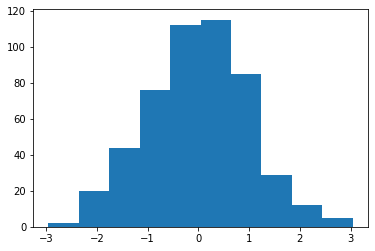

In [79]:

plt.hist(z_group["Edad"])

In [78]:
fill_na_mean = lambda x : x.fillna(x.mean())
    
double_group.transform(fill_na_mean)

,Height,Peso,Edad,Income
0,151.042558,83.111889,29.523529,22356.150950
1,155.792569,100.299180,46.201637,18611.641848
2,147.853735,-23.486364,21.949782,17657.493417
3,121.147744,81.485192,15.253052,17913.897936
4,139.442905,94.689391,30.288096,19424.964687
...,...,...,...,...
495,108.776097,66.419776,34.778671,14679.526106
496,201.499622,47.618843,52.665379,16833.196667
497,163.505233,66.224703,26.863944,17841.795286
498,184.658839,67.819480,33.207831,21507.376016


## Operaciones diversas muy utiles

In [80]:
double_group.tail(1)

,Genero,Situacion Economica,Height,Peso,Edad,Income
491,Female,Poor,177.877349,118.726951,40.623161,21026.212006
493,Male,Rich,167.718069,118.549918,36.432705,18771.400779
496,Female,Middle Class,201.499622,47.618843,52.665379,16833.196667
497,Female,Rich,163.505233,66.224703,26.863944,17841.795286
498,Male,Poor,184.658839,67.819480,33.207831,21507.376016
499,Male,Middle Class,172.203460,78.029115,42.049930,15880.430831


In [81]:
double_group.nth(32)

Height        Peso       Edad        Income
Genero Situacion Economica                                                 
Female Middle Class         183.024116   97.740486  41.164872  16863.740303
       Poor                 165.030564   67.030292  31.468324  12261.433525
       Rich                 137.730709  112.259813  17.540506  16769.950355
Male   Middle Class         175.209713  115.034142  52.802492  15557.007306
       Poor                 146.886184   59.394110   6.919424  11301.224302
       Rich                 172.361387   52.664543  27.878546  16983.762431

In [83]:
data_soarted = data.sort_values(["Edad", "Income"])
data_soarted.head()

,Genero,Situacion Economica,Height,Peso,Edad,Income
393,Female,Poor,171.070432,100.612556,-5.738918,10778.453747
248,Male,Middle Class,156.157101,71.914712,-3.059151,17519.316535
102,Female,Rich,161.612174,109.809375,4.120049,18625.697157
141,Male,Middle Class,136.760081,38.491780,4.411952,16870.075788
166,Male,Rich,96.326581,25.357565,4.643009,17694.706766


In [84]:
age_grouped = data_soarted.groupby('Genero')
age_grouped.head(1)

,Genero,Situacion Economica,Height,Peso,Edad,Income
393,Female,Poor,171.070432,100.612556,-5.738918,10778.453747
248,Male,Middle Class,156.157101,71.914712,-3.059151,17519.316535


In [85]:
age_grouped.tail(1)

,Genero,Situacion Economica,Height,Peso,Edad,Income
122,Male,Rich,154.90383,9.094107,63.870383,15665.620374
410,Female,Rich,202.69049,93.625983,66.346371,12654.327528


# Conjunto de entrenamiento y conjunto de testing

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split




In [117]:
data = pd.read_csv("../python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [118]:
len(data)

3333

In [119]:
# Dividir utilizando la distribucion normal

In [120]:
a = np.random.randn(len(data))

(array([ 10.,  49., 220., 440., 819., 848., 563., 285.,  91.,   8.]),
 array([-3.44683216, -2.7814371 , -2.11604204, -1.45064699, -0.78525193,
        -0.11985687,  0.54553819,  1.21093325,  1.8763283 ,  2.54172336,
         3.20711842]),
 <a list of 10 Patch objects>)

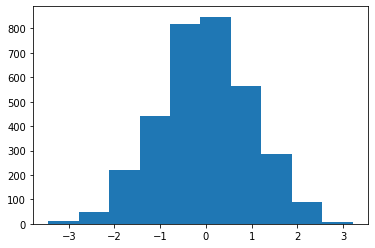

In [121]:
plt.hist(a)

In [122]:
check = (a<0.8)
check = np.array(check).astype(int)

(array([ 719.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2614.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

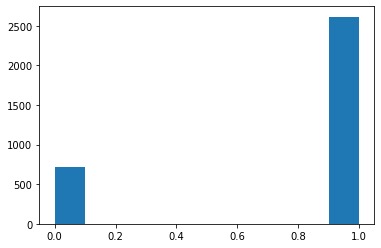

In [123]:
plt.hist(check)

In [133]:
training= int(data[check])
testing= int(data[~check])

KeyError: "None of [Int64Index([1, 1, 0, 1, 1, 0, 0, 0, 1, 1,\n            ...\n            0, 1, 1, 1, 1, 1, 1, 0, 1, 1],\n           dtype='int64', length=3333)] are in the [columns]"

In [125]:
#Con la libreria sklearn

In [126]:
train , test = train_test_split(data, test_size = 0.2)
len(train)

2666

In [127]:
len(test)

667

In [128]:
##Usando una funcion de shaffle

In [129]:
import numpy as np

In [130]:
import sklearn

In [131]:
data = sklearn.utils.shuffle(data)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2653,OK,155,408,367-6136,no,yes,30,61.6,103,10.47,...,110,21.68,225.9,96,10.17,12.4,5,3.35,1,False.
445,TX,70,510,390-5470,no,no,0,59.5,103,10.12,...,106,21.86,208.3,86,9.37,11.1,6,3.00,0,False.
3288,SC,78,415,360-3126,no,no,0,109.5,105,18.62,...,90,24.32,247.6,113,11.14,4.9,9,1.32,1,False.
2254,FL,97,415,415-2285,no,yes,28,202.3,97,34.39,...,84,5.88,257.6,64,11.59,6.7,3,1.81,1,False.
837,NC,64,510,341-2603,yes,yes,33,127.2,93,21.62,...,104,13.85,247.4,109,11.13,8.1,13,2.19,0,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,IN,69,510,348-1592,no,no,0,135.4,101,23.02,...,124,20.24,195.6,102,8.80,10.6,2,2.86,1,False.
1324,VA,118,415,392-3315,no,no,0,154.6,112,26.28,...,105,15.66,217.4,102,9.78,12.6,5,3.40,2,False.
2675,OR,60,415,366-9430,no,no,0,207.8,109,35.33,...,112,10.50,291.6,115,13.12,5.7,9,1.54,0,False.
1331,OK,101,408,405-1780,no,no,0,209.6,107,35.63,...,96,19.45,172.4,85,7.76,7.6,2,2.05,3,False.


In [134]:
cut_id = int (0.75*len(data))
train_data =data[:cut_id]
test_data= data[cut_id+1:]

In [135]:
len(train_data)

2499

In [136]:
len(test_data)

833